# Multi-objective Robust Optimization (MORO)


This exercise demostrates the application of MORO on the lake model. In contrast to the exercises in previous weeks, we will be using a slightly more sophisticated version of the problem. For details see the MORDM assignment for this week.

## Setup MORO

Many objective robust optimization aims at finding decisions that are robust with respect to the various deeply uncertain factors. For this, MORO evalues each candidate decision over a set of scenarios. For each outcome of interest, the robusntess over this set is calculated. A MOEA is used to maximize the robustness. 

For this assignment, we will be using a domain criterion as our robustness metric. The table below lists the rules that you should use for each outcome of interest.

|Outcome of interest| threhsold  |
|-------------------|------------|
| Maximum pollution | $\leq$ 0.75|
| Inertia           | $\geq$ 0.6 |
| Reliability       | $\geq$ 0.99|   
| Utility           | $\geq$ 0.75|

**1) Implement a function for each outcome that takes a numpy array with results for the outcome of interest, and returns the robustness score**

In [42]:
from lakemodel_function import lake_problem
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model)
import pandas as pd
from ema_workbench.analysis import prim
import numpy as np
import matplotlib as plt

from ema_workbench import MultiprocessingEvaluator

In [43]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def maxp(data):
    return np.sum(data<=0.75)/data.shape[0]
    
SMALLER = 'SMALLER'
LARGER = 'LARGER'

maxp = functools.partial(robustness, SMALLER, 0.75)
inertia = functools.partial(robustness, LARGER, 0.6)
reliability = functools.partial(robustness, LARGER, 0.99)
utility = functools.partial(robustness, LARGER, 0.75)




In [44]:
# Loading dps lake model
from dps_lake_model import lake_model

from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, ema_logging,
                           Constant)

ema_logging.log_to_stderr(ema_logging.INFO)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_model)
lake_model.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
lake_model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                            RealParameter('stdev', 0.001, 0.005),
                            RealParameter('b', 0.1, 0.45),
                            RealParameter('q', 2.0, 4.5),
                            RealParameter('delta', 0.93, 0.99)]

# set levers
lake_model.levers = [RealParameter("c1", -2, 2),
                RealParameter("c2", -2, 2),
                RealParameter("r1", 0, 2),
                RealParameter("r2", 0, 2),
                RealParameter("w1", 0, 1)]

#specify outcomes 
#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P'),
                       ScalarOutcome('utility'),
                       ScalarOutcome('inertia'),
                       ScalarOutcome('reliability')]


lake_model.constantcs = [Constant('alpha', 0.41),
                         Constant('reps', 150)]

**2) Generate 4 random release policies, and evaluate them over 500 scenarios. Sample the scenarios using Monte Carlo sampling. Next evaulate your robustness function for 1, 2, 3, ... 500 scenarios for each outcome and visualize this. What can you tell about the convergernce of the robusntess metric as a function of the number of scenarios?**

In [64]:
#ema_workbench.em_framework.samplers.MonteCarloSampler

n_scenarios = 500
n_policies = 4

with MultiprocessingEvaluator(lake_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios, n_policies, uncertainty_sampling="mc")   

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 500 scenarios * 4 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1400 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 1800 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [65]:
experiments

,b,delta,mean,q,stdev,c1,c2,r1,r2,w1,scenario,policy,model
0,0.189559,0.944923,0.043710,3.631958,0.003145,0.908892,1.026726,0.090359,1.913718,0.881217,3900,32,lakeproblem
1,0.430931,0.964462,0.010320,2.996456,0.004536,0.908892,1.026726,0.090359,1.913718,0.881217,3901,32,lakeproblem
2,0.343625,0.985620,0.024164,4.359675,0.001690,0.908892,1.026726,0.090359,1.913718,0.881217,3902,32,lakeproblem
3,0.259371,0.976795,0.049008,2.734923,0.001090,0.908892,1.026726,0.090359,1.913718,0.881217,3903,32,lakeproblem
4,0.330506,0.943690,0.033735,2.329410,0.001561,0.908892,1.026726,0.090359,1.913718,0.881217,3904,32,lakeproblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.440014,0.930672,0.013751,3.181135,0.004387,-0.943146,-1.686529,1.392849,0.626376,0.422167,4395,35,lakeproblem
1996,0.123157,0.984577,0.012111,4.335614,0.004558,-0.943146,-1.686529,1.392849,0.626376,0.422167,4396,35,lakeproblem
1997,0.430203,0.940213,0.027905,3.076830,0.002329,-0.943146,-1.686529,1.392849,0.626376,0.422167,4397,35,lakeproblem
1998,0.437212,0.982127,0.048101,4.409108,0.001898,-0.943146,-1.686529,1.392849,0.626376,0.422167,4398,35,lakeproblem


In [66]:
outcomes = pd.DataFrame.from_dict(outcomes)
outcomes

,max_P,utility,inertia,reliability
0,6.026725,0.722030,0.9892,0.0500
1,0.360993,1.095372,0.9900,1.0000
2,0.442221,2.128153,0.9900,1.0000
3,4.363012,1.559000,0.9900,0.0500
4,3.247842,0.704150,0.9865,0.0500
...,...,...,...,...
1995,0.316204,0.576530,0.9900,1.0000
1996,9.029479,2.045401,0.9900,0.0643
1997,2.489967,0.667632,0.9900,0.2623
1998,0.365737,1.869328,0.9900,1.0000


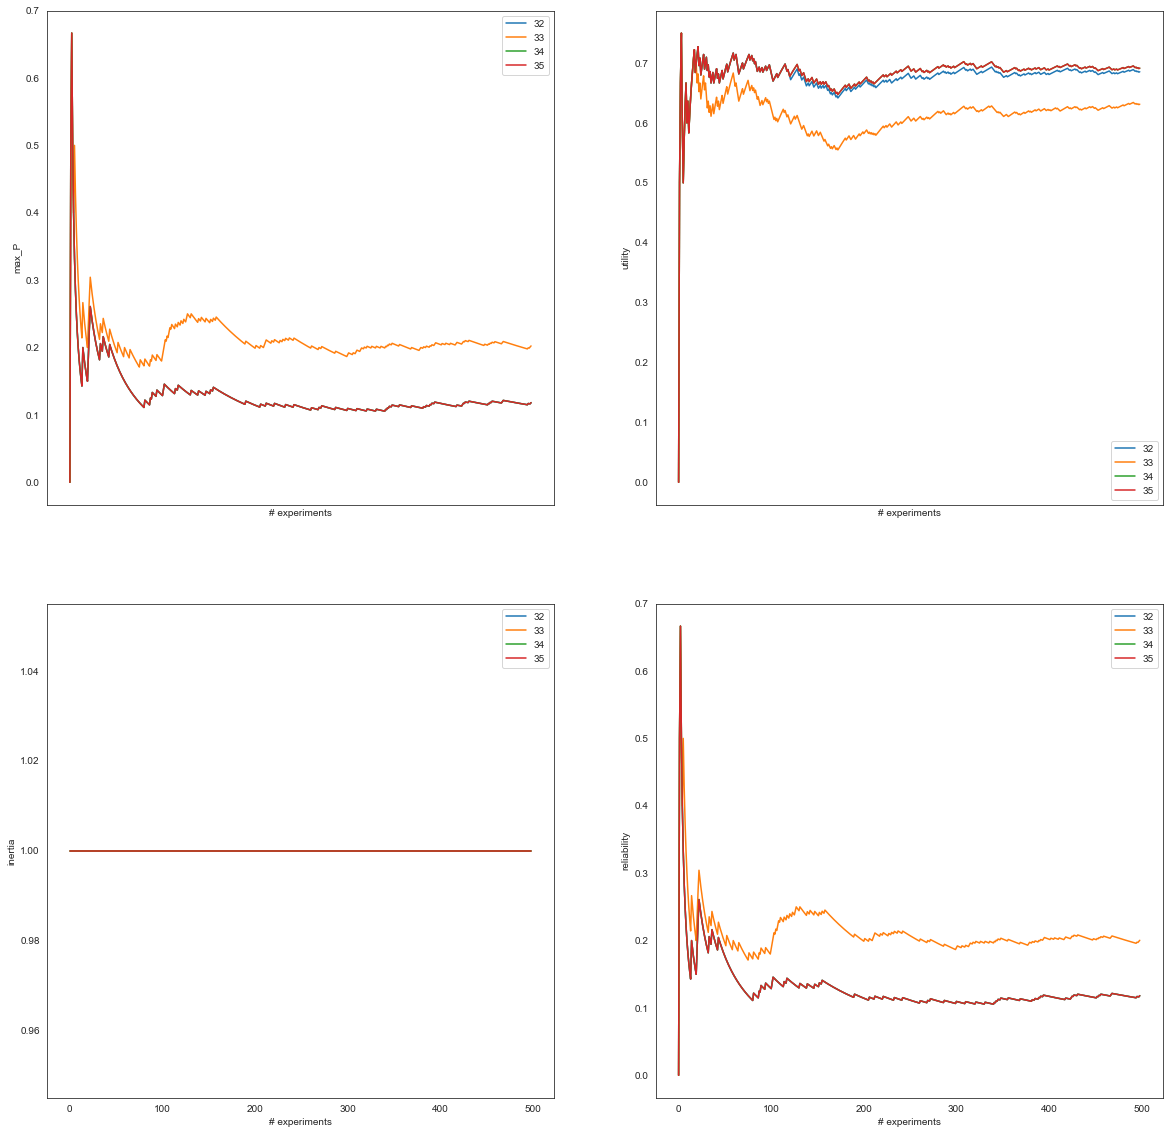

In [67]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,20),
                        sharex=True)
axes = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]                             #axes[1,1]

robustness_funcs = {"max_P": maxp,
                    "utility": utility,
                    "inertia": inertia,
                   "reliability": reliability}

#experiments, outcomes = results

for ax, (outcome, value) in zip(axes, outcomes.items()):
    for policy in np.unique(experiments['policy']):
        logical = experiments['policy'] == policy
        data = value[logical]
        
        robustness = []
      
        for i in range(1, data.shape[0]):
            robustness.append(robustness_funcs[outcome](data[0:i]))
        ax.plot(robustness, label=policy, )
    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)
    ax.legend()

The robustness of the different outcomes and the different policies can be found in the graphs above. The robustness of the several policies are not very destinctive. It is also clear that there is a tradeoff between reliability and max P with utility. This is the result of higher phosphor emissions leading to higher utility but also higher phosphor concentrations and lower reliability which is both undesirable.

At the start of the curves, the lines change very fast, but after more experiments the behaviour gets more stable. After roughly 300 experiments, the robustness settles around a certain value for each policy. This behaviour can be explained because with lower amounts of experiments, the effect of one scenario is bigger on the robustness than with a higher amount of experiments. It makes it clear that a high amount of experiments is needed to get proper and reliable values for robustness of the different outcomes 

## Searching for candidate solutions
Set up the robust optimization problem using the robustness functions you have specified. Assume that you will need 50 scenarios for estimating the robustness. Use $\epsilon$-progress and hypervolume to track convergence. Solve the optimization problem. As $\epsilon$ values, you can assume 0.05 for each of the four robustness metrics.

*note: this optimization problem is computationally very expensive. Develop and test your code using a sequential evaluator, a low number of function evaluations (e.g., 200), and a low number of scenarios (e.g., 5). Once everything seems to be working replace the sequential evaluator with an multiprocessing or ipyparallel evaluator, and increase the number of nfe and scenarios*.


In [49]:
from ema_workbench.em_framework import sample_uncertainties
n_scenarios = 50
scenarios = sample_uncertainties(lake_model, n_scenarios)
nfe = int(200)

In [50]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)


In [51]:
with MultiprocessingEvaluator(lake_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios,              
                                            policies=10)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 50 scenarios * 10 policies * 1 model(s) = 500 experiments
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 250 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 350 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 450 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


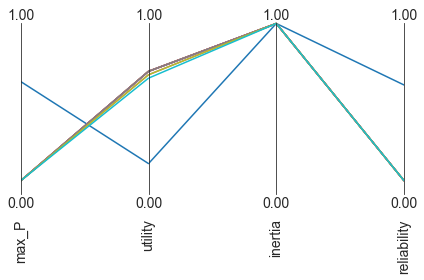

In [52]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {"max_P": maxp,
         "utility": utility,
         "inertia": inertia,
         "reliability": reliability}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [53]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def costs(data):
    return data[0]/1e9 # makes numbers nicer
    
SMALLER = 'SMALLER'
LARGER = "LARGER"

maxp = functools.partial(robustness, SMALLER, 0.75)
inertia = functools.partial(robustness, LARGER, 0.6)
reliability = functools.partial(robustness, LARGER, 0.99)
utility = functools.partial(robustness, LARGER, 0.75)

In [54]:
MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {"max_P": maxp,
         "utility": utility,
         "inertia": inertia,
         "reliability": reliability}

robustnes_functions = [ScalarOutcome('max_P', kind=MINIMIZE, 
                             variable_name='max_P', function=maxp),
                       ScalarOutcome('utility', kind=MAXIMIZE, 
                             variable_name='utility', function=utility),
                       ScalarOutcome('inertia', kind=MAXIMIZE, 
                             variable_name='inertia', function=inertia),
                      ScalarOutcome('reliability', kind=MAXIMIZE, 
                             variable_name='reliability', function=reliability)]

In [55]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging, 
                           perform_experiments, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume, 
                                                     EpsilonProgress)
from ema_workbench.em_framework.evaluators import BaseEvaluator

BaseEvaluator.reporting_frequency = 0.1

ema_logging.log_to_stderr(ema_logging.INFO)

# there is a bit of problem with platypus, so using 1.1. gives 
# cleaner hypervolume results.
convergence = [HyperVolume(minimum=[0,0,0,0], maximum=[1.1, 1.1, 1.1,1.1]),
              EpsilonProgress()]

epsilons=[0.01, 0.01, 0.01, 0.01, 0.01]  
with MultiprocessingEvaluator(lake_model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios,nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/200 nfe
[MainProcess/INFO] optimization completed, found 16 solutions
[MainProcess/INFO] terminating pool


**Plot your $\epsilon$-progress to evaluate convergergence, and visualize the trade-offs using parallel coordinate plots**

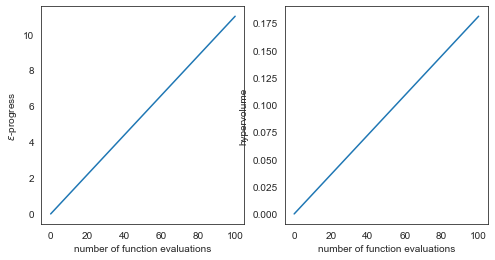

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

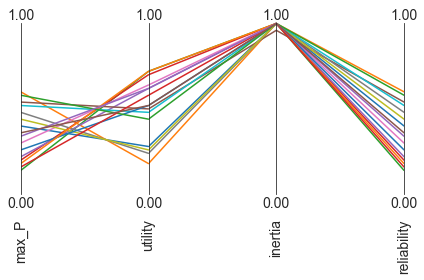

In [57]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.plot

**What does this plot tell us about the tradeoffs and conflicting objectives?**

There is a trade-off between high robustness in reliability and max p with a high reliability in utility. These are the conflicting objectives and one has to make a decision between these objectives. The inertia doesn't seem to be affected and appears to be always 1

## Re-evaluate candidate solutions under uncertainty

We have used only 50 scenarios for the optimization. Take the results and re-evaluate them over a larger set (assume 1000 scenarios). How different are your results? What does this imply for the assumption of 50 scenarios during robust optimization.

*hint: use the to_dict method on a dataframe, next generate Policy objects in a list expression by iterating over the dicts returned by the to_dict method*

In [58]:
from ema_workbench import Policy

policies = archive.drop([o.name for o in robustnes_functions], axis=1)
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy("moro {}".format(i), **policy.to_dict()))

In [59]:
n_scenarios = 1000
with MultiprocessingEvaluator(lake_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

#start = time.time()
#end = time.time()

#print('Processing time:',(end-start)/60,'Minutes')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 16 policies * 1 model(s) = 16000 experiments
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 6400 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 11200 cases completed
[MainProcess/INFO] 12800 cases completed
[MainProcess/INFO] 14400 cases completed
[MainProcess/INFO] 16000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [60]:
from ema_workbench import save_results

save_results(results, 'MORO_reevaluation.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\degen\OneDrive\Bureaublad\M\fourth block\model based decision making\epa_1361-main\Week 5-6 - robustness and direct search\MORO_reevaluation.tar.gz


In [61]:
policies.to_csv('moro polices.csv')

In [62]:
import pandas as pd
experiments, outcomes = results

overall_robustness = {}
for policy in np.unique(experiments['policy']):
    policy_robustness = {}

    logical = experiments['policy'] == policy
    
    for outcome, values in outcomes.items():
        values = values[logical]
        policy_robustness[outcome] = robustness_funcs[outcome](values)
    overall_robustness[policy] = policy_robustness
overall_robustness = pd.DataFrame.from_dict(overall_robustness).T
overall_robustness

,max_P,utility,inertia,reliability
moro 0,0.375,0.304,1.000,0.365
moro 1,0.658,0.101,1.000,0.653
moro 10,0.290,0.536,1.000,0.290
moro 11,0.135,0.710,1.000,0.133
moro 12,0.606,0.350,1.000,0.605
moro 13,0.153,0.579,1.000,0.152
moro 14,0.321,0.605,1.000,0.321
moro 15,0.372,0.511,1.000,0.371
moro 2,0.106,0.718,1.000,0.106
moro 3,0.168,0.683,0.997,0.164


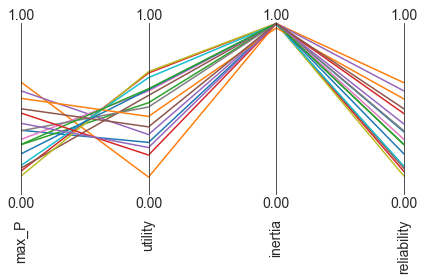

In [63]:

data = overall_robustness.loc[:, 
                              ['max_P','utility', 'inertia', 'reliability']]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

The results seem to be the same compared to the other results. Again there is a trade-off between max_P and reliability and utility. In this case the 50 scenarios used before are enough to get valid results for potential trade-offs in this system. 

## Comparison
If you have time, import your solutions found for MORDM and re-evaluate them over the same set of scnearios as used for re-evaluating the MORO results. Compare the robustness of MORDM and MORO, what do you observe? 